## The Numerov Algorithm

The dimensional SE for harmonic potential is:

$$\frac{d^2\psi}{dx^2} + \frac{2m}{\hbar^2}\bigg(E - \frac{1}{2}m\omega^2x^2\bigg)\psi = 0$$

The non-dimensionlized SE for harmonic potential is:

$$\frac{d^2y}{d\tilde{x}^2} = -K^2(\tilde{x})y$$

where,
$E_0 = \hbar \omega$ and $E = E_0\tilde{E}$ and $V(x) = E_0 \tilde{V}(x)$

$x = l_0\tilde{x}$

$K^2(x) = \tilde{E} - \tilde{V}(\tilde{x})$

$y = \psi /(1/\sqrt{l_0})$

The algorithm can calculate $y_{n+1}$ from the previous two points, if eigenvalue E is known:

$$ \bigg(1+\frac{\Delta x^2}{12}K_{n+1}^2\bigg)y_{n+1} = 2\bigg(1-\frac{5}{12}\Delta x^2 K_n^2 \bigg)y_n - \bigg( 1+ \frac{\Delta x^2}{12}K_{n-1}^2\bigg)y_{n-1}$$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
def eigenvalue(n):
    return n+0.5

def Kn(n):
    return Es-0.25*xs[n]**2
    
def numerov(i):
    y = np.zeros(10)
    K3 = np.zeros(10)
    K2= np.zeros(10)
    K1= np.zeros(10)
    
    K1[:],K2[:],K3[:] = Kn(i-2)[:],Kn(i-1)[:],Kn(i)[:] 
    
    y[:] = 2*(1-(5/12)*dx**2 * K2[:])*ys[:,i-1] - (1+(1/12)*dx**2*K1[:])*ys[:,i-2]
    y[:] = y/(1+(1/12)*(dx**2)*K3[:])
    return y[:]

In [3]:
ns = np.arange(0,10,1,dtype = int)
print(ns)
Es = eigenvalue(ns)

dx = 0.1
xlim = 10.0
xs = np.arange(-xlim,xlim,dx)
N = len(xs)

ys = np.zeros((10,N))
ys[:,0] = 0.0
ys[:,1] = 1e-9

[0 1 2 3 4 5 6 7 8 9]


In [4]:
for i in range(2,N): # evaluate all wavefunctions point by point along x axis
    ys[:,i] = numerov(i)
    

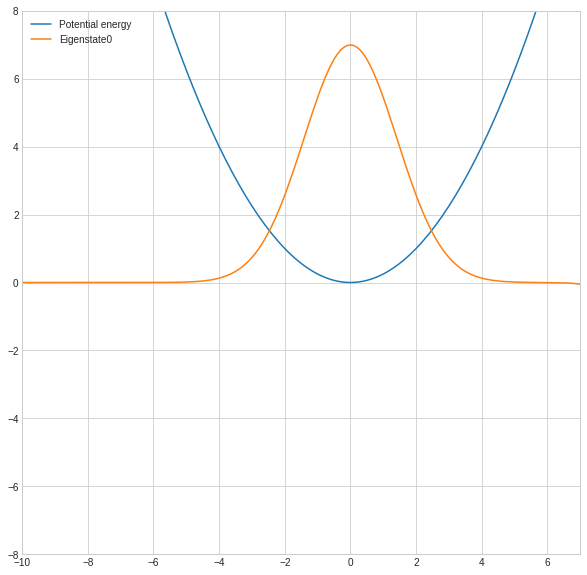

In [6]:
fig = plt.figure(figsize = (10,10))

plt.plot(xs, 0.25*xs**2, label = 'Potential energy')

for i in range(0,1):
    plt.plot(xs,0.1*((i+1)**3.5)*ys[i,:],label = 'Eigenstate%d'%i)
    
plt.xlim(-10,7)
plt.ylim(-8,8)
plt.legend()